In [1]:
import pandas as pd
import numpy as np

num_classes = 50 # the number of breeds we want to classify
seed = 42 # makes the random numbers in numpy predictable
im_size = 299 # This size of the images
batch_size = 32 # Number Of Images To Load

#Read the csv into a dataframe, group the breeds and 
df = pd.read_csv('C:/Users/win10/Documents/pati/Licenta/dog-breed-identification/labels.csv')
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)
df = df[df['breed'].isin(selected_breed_list)]
df['filename'] = df.apply(lambda x: ('train/' + x['id'] + '.jpg'), axis=1)

#Showing Unique Breed Selected:
breeds = pd.Series(df['breed'])
print("total number of breeds to classify",len(breeds.unique()))
df.head()

total number of breeds to classify 50


,id,breed,filename
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,train/000bec180eb18c7604dcecc8fe0dba07.jpg
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier,train/002211c81b498ef88e1b40b9abf84e1d.jpg
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier,train/00290d3e1fdd27226ba27a8ce248ce85.jpg
8,003df8b8a8b05244b1d920bb6cf451f9,basenji,train/003df8b8a8b05244b1d920bb6cf451f9.jpg
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound,train/0042188c895a2f14ef64a918ed9c7b64.jpg


In [3]:
from keras.preprocessing import image

def read_img(img_id, train_or_test, size):
    """Read and resize image.
    # Arguments
        img_id: string
        train_or_test: string 'train' or 'test'.
        size: resize the original image.
    # Returns
        Image as numpy array.
    """
    path =  train_or_test + "/" + img_id + ".jpg"
    img = image.load_img(path, target_size=size)
    return image.img_to_array(img)
print("The Breeds Of the Dogs Comes as the String or Names. So In Order to Feed the Labels into the Neural Network, We are Converting the Breed names into Numeric Characters")

Using TensorFlow backend.
C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

The Breeds Of the Dogs Comes as the String or Names. So In Order to Feed the Labels into the Neural Network, We are Converting the Breed names into Numeric Characters


In [15]:
print(pd.Series(df['breed']).unique())
#if 'boston_bull' in pd.Series(df['breed']).unique():
print(df.at[0,'breed'])
print(df.at[0, 'filename'])

['boston_bull' 'bedlington_terrier' 'basenji' 'scottish_deerhound'
 'maltese_dog' 'african_hunting_dog' 'lakeland_terrier' 'cairn'
 'ibizan_hound' 'weimaraner' 'border_terrier' 'tibetan_terrier'
 'norwegian_elkhound' 'shih-tzu' 'australian_terrier' 'schipperke'
 'rhodesian_ridgeback' 'irish_setter' 'bloodhound' 'samoyed' 'kelpie'
 'papillon' 'entlebucher' 'collie' 'saluki' 'pug' 'airedale' 'leonberg'
 'bernese_mountain_dog' 'lhasa' 'italian_greyhound' 'afghan_hound'
 'old_english_sheepdog' 'miniature_pinscher' 'irish_wolfhound' 'chow'
 'english_foxhound' 'siberian_husky' 'newfoundland' 'dandie_dinmont'
 'great_pyrenees' 'beagle' 'whippet' 'sealyham_terrier' 'japanese_spaniel'
 'pomeranian' 'pembroke' 'blenheim_spaniel' 'silky_terrier'
 'bouvier_des_flandres']
boston_bull
train/000bec180eb18c7604dcecc8fe0dba07.jpg


In [4]:
from sklearn.preprocessing import LabelEncoder
#Declaring the Instance
label_enc = LabelEncoder()
np.random.seed(seed=seed) # Declaring a Random Seed With Nuwmpy
rnd = np.random.random(len(df)) # This is For Random Initiation
# This returns an Array of Boolean
train_idx = rnd < 0.9 # This Returns [True, False] Array
valid_idx = rnd >= 0.9

#Here We are Encoding and Spliting the Data into Testing and Training Set.
y_train = label_enc.fit_transform(df["breed"].values)
ytr = y_train[train_idx] #This Contais Our Training Set
yv = y_train[valid_idx] #This Contains Out Testing Set

In [5]:
from tqdm import tqdm
#Importing the Pretrained Neural Network(For Transfer Learning)
from keras.applications import xception

#Creating Placeholder for Image Array(Training and Validation Images With 3 Colour Channels i.e Depth)
x_train = np.zeros((train_idx.sum(), im_size, im_size, 3), dtype='float32')
x_valid = np.zeros((valid_idx.sum(), im_size, im_size, 3), dtype='float32')
train_i = 0
valid_i = 0
for i, img_id in tqdm(enumerate(df['id'])):
    #Reading the Image using Pre-Processing Function Created Before
    img = read_img(img_id, 'C:/Users/win10/Documents/pati/Licenta/dog-breed-identification/train', (im_size, im_size))
    #Here We are Normalizing the Image. It Takes the Numpy Array of Image and Converts into the Format that 
    #Xception Neural Network Reocgs i.e. Value Between [-1,1]
    x = xception.preprocess_input(np.expand_dims(img.copy(), axis=0))
    #Block Execuites If Array Contains True(Bool)
    if train_idx[i]:
        x_train[train_i] = x
        train_i += 1
        #Adding It To the Training Set
    elif valid_idx[i]:
        x_valid[valid_i] = x
        valid_i += 1
print('Train Images shape: {} size: {:,}'.format(x_train.shape, x_train.size))
#Showing The Shape Of The Training Images

4890it [04:18, 18.92it/s]


Train Images shape: (4424, 299, 299, 3) size: 1,186,530,072


In [5]:
print("Image Augmentation(Real Time) \n This Technique Will Increase Image Size, Involving Creating a New Image By Transformation(Rotation, Scaling, Noise). This Helps in Effective Training Of the Neural Network(CNN)")

Image Augmentation(Real Time) 
 This Technique Will Increase Image Size, Involving Creating a New Image By Transformation(Rotation, Scaling, Noise). This Helps in Effective Training Of the Neural Network(CNN)


In [6]:
from keras.preprocessing.image import ImageDataGenerator

#Declaring the Class For Image Augmentation Process(Options are Parameters)
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

#Generating the Image From Fectures Declared
train_generator = train_datagen.flow(x_train, 
                                     ytr, 
                                     batch_size=batch_size)


valid_datagen = ImageDataGenerator()

valid_generator = valid_datagen.flow(x_valid, 
                                     yv, 
                                     batch_size=batch_size)

In [7]:
print("Transfer Learning And Model Declaration. We Are Using Pre-Trained Model For Our Task")

Transfer Learning And Model Declaration. We Are Using Pre-Trained Model For Our Task


In [8]:
#Declaring the Neural Network model
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Model, Input

# create the base pre-trained model
#We are Not Including the Weights of Last Layer(Modifying)
base_model = xception.Xception(weights='imagenet', include_top=False)
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional Xception layers
for layer in base_model.layers:
    layer.trainable = False

# Add a global spatial average pooling layer
x = base_model.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
# and a logistic layer and set it to the number of breeds we want to classifiy, 
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint

epochs = 10
learning_rate = 0.001

# checkpoints
early_stopping = EarlyStopping(monitor='val_acc', patience=5)
STAMP = "{}_dog_breed_model".format(datetime.date.today().strftime("%Y-%m-%d"))

#Saving Our Trained Model
bst_model_path = "{}.h5".format(STAMP)
model_checkpoint = ModelCheckpoint(bst_model_path,
                                   save_best_only=True,
                                   save_weights_only=False,
                                  verbose=1)



# compile the model (should be done *after* setting layers to non-trainable)
optimizer = RMSprop(lr=learning_rate, rho=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

hist = model.fit_generator(train_generator,
                           steps_per_epoch=train_idx.sum() // batch_size,
                           epochs=epochs, callbacks=[early_stopping, model_checkpoint],
                           validation_data=valid_generator,
                           validation_steps=valid_idx.sum() // batch_size)

# serialize weights to HDF5
model.save(bst_model_path)
print("Saved model to disk")

Epoch 1/10
138/138 [==============================] - 3658s 27s/step - loss: 1.0460 - accuracy: 0.7190 - val_loss: 0.2986 - val_accuracy: 0.9464


C:\Users\win10\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning



Epoch 00001: val_loss improved from inf to 0.29856, saving model to 2020-04-13_dog_breed_model.h5
Epoch 2/10
138/138 [==============================] - 3556s 26s/step - loss: 0.6743 - accuracy: 0.8124 - val_loss: 0.1950 - val_accuracy: 0.9378

Epoch 00002: val_loss improved from 0.29856 to 0.19500, saving model to 2020-04-13_dog_breed_model.h5
Epoch 3/10
138/138 [==============================] - 3569s 26s/step - loss: 0.6184 - accuracy: 0.8399 - val_loss: 0.0709 - val_accuracy: 0.9493

Epoch 00003: val_loss improved from 0.19500 to 0.07089, saving model to 2020-04-13_dog_breed_model.h5
Epoch 4/10
138/138 [==============================] - 3567s 26s/step - loss: 0.6228 - accuracy: 0.8420 - val_loss: 0.0543 - val_accuracy: 0.9447

Epoch 00004: val_loss improved from 0.07089 to 0.05430, saving model to 2020-04-13_dog_breed_model.h5
Epoch 5/10
138/138 [==============================] - 3563s 26s/step - loss: 0.6063 - accuracy: 0.8490 - val_loss: 0.2069 - val_accuracy: 0.9286

Epoch 00005

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


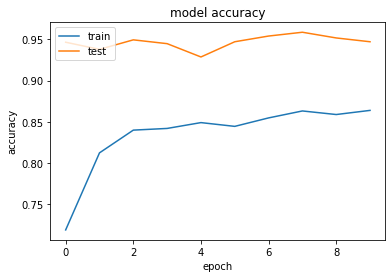

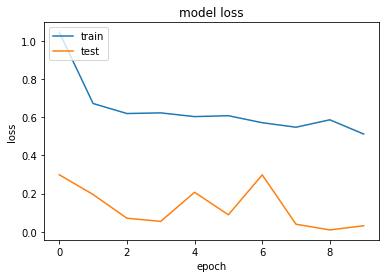

In [16]:
import matplotlib.pyplot as plt
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


#This Function is For Pre-Processing the Image For Feeding into Neural Network
def predict_from_image(img_path):
  
    img = image.load_img(img_path, target_size=(299, 299))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    
    pred = model.predict(img_tensor)
    sorted_breeds_list = sorted(selected_breed_list)
    predicted_class = sorted_breeds_list[np.argmax(pred)]
    
    plt.imshow(img_tensor[0])                           
    plt.axis('off')
    plt.show()

    return predicted_class, max(pred)

In [6]:
print("Server")
from keras.models import load_model
model = load_model('2020-04-13_dog_breed_model.h5')
# predict_from_image("https://scontent.xx.fbcdn.net/v/t1.0-0/p480x480/46450986_347833089130675_1126767133754130432_n.jpg?_nc_cat=111&_nc_ht=scontent.xx&oh=9a149438b2243510e3b8d16921e575bc&oe=5C6FA5C1")

Server


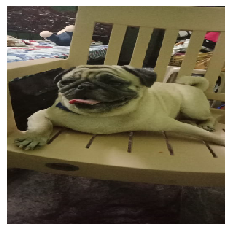

pug
1.147958172964536e-07


In [9]:
#Getting Image From URL
#!wget http://www.dogbreedslist.info/uploads/allimg/dog-pictures/Scottish-Deerhound-2.jpg

#Testing This With My Own Pug Dog Image Taken In Phone
img_path = 'puggy.jpeg'    # dog
classes, prob = predict_from_image(img_path)
print(f"{classes}\n{prob[selected_breed_list.index(classes)]}")

In [7]:
selected_breed_list = ['scottish_deerhound',
 'maltese_dog',
 'afghan_hound',
 'entlebucher',
 'bernese_mountain_dog',
 'shih-tzu',
 'great_pyrenees',
 'pomeranian',
 'basenji',
 'samoyed',
 'airedale',
 'tibetan_terrier',
 'leonberg',
 'cairn',
 'beagle',
 'japanese_spaniel',
 'australian_terrier',
 'blenheim_spaniel',
 'miniature_pinscher',
 'irish_wolfhound',
 'lakeland_terrier',
 'saluki',
 'papillon',
 'whippet',
 'siberian_husky',
 'norwegian_elkhound',
 'pug',
 'chow',
 'italian_greyhound',
 'pembroke',
 'ibizan_hound',
 'border_terrier',
 'newfoundland',
 'lhasa',
 'silky_terrier',
 'bedlington_terrier',
 'dandie_dinmont',
 'irish_setter',
 'sealyham_terrier',
 'rhodesian_ridgeback',
 'old_english_sheepdog',
 'collie',
 'boston_bull',
 'english_foxhound',
 'bouvier_des_flandres',
 'african_hunting_dog',
 'schipperke',
 'kelpie',
 'weimaraner',
 'bloodhound',
 'bluetick',
 'saint_bernard',
 'labrador_retriever',
 'chesapeake_bay_retriever',
 'norfolk_terrier',
 'english_setter',
 'wire-haired_fox_terrier',
 'kerry_blue_terrier',
 'scotch_terrier',
 'yorkshire_terrier',
 'groenendael',
 'greater_swiss_mountain_dog',
 'irish_terrier',
 'basset',
 'keeshond',
 'west_highland_white_terrier',
 'gordon_setter',
 'malamute',
 'affenpinscher',
 'toy_poodle']

In [17]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [1]:
conda install keras

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\win10\anaconda3

  added / updated specs:
    - keras


The following NEW packages will be INSTALLED:

  keras              pkgs/main/win-64::keras-2.3.1-0
  keras-base         pkgs/main/win-64::keras-base-2.3.1-py36_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install keras --upgrade

Requirement already up-to-date: keras in c:\users\win10\anaconda3\lib\site-packages (2.3.1)
Note: you may need to restart the kernel to use updated packages.


In [6]:
#Evaluating the Test Set
from keras.models import load_model
model = load_model('2020-04-13_dog_breed_model.h5')
predictions = model.predict(x=x_valid, batch_size=32, verbose=0)
print(predictions)



[[2.4855515e-09 1.5414873e-09 9.7807515e-07 ... 1.2747475e-07
  2.8324520e-08 6.5730457e-09]
 [2.4201108e-09 1.5159348e-09 4.3465448e-08 ... 3.3900247e-07
  9.9993920e-01 1.6464899e-08]
 [1.8696310e-10 7.2348488e-10 1.1115432e-06 ... 1.2503376e-08
  9.9994886e-01 1.7852006e-08]
 ...
 [2.2272616e-05 2.6792495e-07 5.6203389e-05 ... 4.2330581e-07
  1.1661988e-07 5.9954021e-07]
 [5.9747583e-07 1.0982509e-09 1.9831745e-10 ... 3.1088530e-07
  3.0896763e-09 7.4114093e-09]
 [5.2203304e-06 2.6274615e-06 1.3404023e-03 ... 3.2509365e-06
  5.2897295e-08 2.6311064e-03]]


In [7]:
rounded_predictions = np.argmax(predictions, axis = -1)

In [8]:
#deeplizard.com/learn/video/2f-NjDUvZIE
for i in rounded_predictions:
    print(i)

6
48
48
18
38
38
23
44
7
23
27
27
17
45
24
15
30
20
2
42
41
45
16
8
9
12
21
46
32
40
24
40
8
42
44
12
44
34
47
29
43
34
7
43
8
16
36
43
41
33
28
37
31
6
22
13
46
40
49
25
30
29
3
10
47
0
19
30
32
42
14
7
11
35
48
11
7
10
26
40
49
7
30
41
29
36
0
38
32
14
7
26
4
23
21
36
14
38
2
39
5
0
2
40
11
19
35
23
30
6
42
45
19
11
18
8
22
8
36
21
29
41
48
24
2
49
33
12
18
47
22
10
20
4
37
2
43
44
11
7
24
35
27
39
44
32
42
30
44
12
27
4
14
7
27
37
9
29
13
47
44
19
4
2
35
22
29
11
44
11
48
9
34
34
14
38
9
41
18
44
30
12
26
23
7
18
4
44
21
45
2
38
36
42
18
15
17
42
11
8
29
22
40
48
24
22
41
19
27
13
16
35
49
25
9
8
39
42
21
41
24
36
40
17
27
6
42
49
32
19
9
24
30
24
42
13
40
30
40
36
0
7
34
6
22
3
40
47
0
34
40
32
11
4
42
17
10
0
14
39
34
5
5
17
10
12
3
24
19
8
34
42
3
2
23
23
18
46
44
33
34
13
37
35
20
18
24
40
7
36
48
11
38
21
17
34
22
1
21
27
44
4
22
41
6
43
31
29
3
41
45
10
7
15
37
48
43
42
36
43
8
44
18
23
18
24
15
47
13
21
41
8
38
8
42
4
12
47
30
34
10
34
49
32
0
3
19
45
19
45
49
47
42
48
31
8
2

In [95]:
#Confusion matrix for multiclass classification
from sklearn.metrics import confusion_matrix
print(yv)
confusion=confusion_matrix(yv, rounded_predictions)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy {:.2f}\n'.format(accuracy_score(yv,rounded_predictions)))

print('Micro Precision: {:.2f}'.format(precision_score(yv, rounded_predictions, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yv, rounded_predictions, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yv, rounded_predictions, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yv, rounded_predictions, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yv, rounded_predictions, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yv, rounded_predictions, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yv, rounded_predictions, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yv, rounded_predictions, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yv, rounded_predictions, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(yv, rounded_predictions, target_names=selected_breed_list))

[ 6 48 48 18 38 38 23 44  7 23 27 27 17 45 24 15 30 20  2 42 41 45 13  8
  9 12 21  3 32 40 24 40  8 42 44 12 44 34 47 29 43 24  7 43  8 16 36 26
 41 33 28 37 31  6 22 13 46 40 49 25 30 29  3 10 47  0 19 30 32 42 14  7
 11 35 48 11  7 10 26 40 49  7 30 41 43 36  0 38 32 14  7 26  4 23 21 36
 14 38 26 39  5  0  2 40 11 19 35 23 30  6 42 45 19 11 18  8 22  8 36 21
 29 41 48 24  2 49 33 12 18 47 22 10 49  4 37  2 43 44 11  7 24 35 27 39
 44 32 42 30 44 12 27  4 14  7 27 37  9 29 13 47 28 19  4  2 35 22 29 11
 44 11 48  9 34 34 14 38  9 41 18 44 30 12 26 23  7 18  4 28 21 45  2 38
 36 42 18 15 17 42 11  8 29 22 40 48 24 22 41 19 27 13 16 35 49 25  9  8
 39 42 21 41 24 36 40 17 27  6 42 49 32 19  9  8 30 24 42 47 40 30 40 36
  0  7 34  6 42  3 40 47  0 34 40 32 11  4 42 17 10  0 14 39 34  5  5 17
 10 12  3 24 19  8 34 42  3 26 23 23 18 46 44 33 34 13 37 35 20 18 24 40
  7 36 48 11 38 21 17 34 42  1 21 27 44  4 22 41  6 43 31 29  3 41 45 10
  7 15 37 48 43 42 36 43  8 44 18 23 18 24 15 47 13

In [104]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt

"""
Prints and plots the confusion matrix. Normalization can be applied by settings 'normalize=True'
"""
def confusion_matrix_normalization(cm,normalize=False):
    if normalize:
        cm=cm.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    cm=np.around(cm,decimals=3)

    leftmargin = 0.5#inches
    rightmargin = 0.5#inches
    categorysize = 0.5 #inches
    figwidth = leftmargin + rightmargin + (len(selected_breed_list) * categorysize)
    #print(figwidth)

    f = plt.figure(figsize=(figwidth, figwidth))
    ax = f.add_subplot(111)
    ax.set_aspect(1)
    f.subplots_adjust(left=leftmargin/figwidth, right=1-rightmargin/figwidth, top=1.5, bottom=1)
    res=ax.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)

    # plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix for Dog Identification')
    plt.colorbar(res)
    # tick_marks=np.arange(len(selected_breed_list))
    # plt.xticks(tick_marks, selected_breed_list, rotation=45)
    # plt.yticks(tick_marks, selected_breed_list)
    ax.set_xticks(range(len(selected_breed_list)))
    ax.set_yticks(range(len(selected_breed_list)))
    ax.set_xticklabels(selected_breed_list, rotation= 45, ha='right')
    ax.set_yticklabels(selected_breed_list)

    print(cm)
    fmt='.2f' if normalize else 'd'
    thresh=confusion.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i,j, format(cm[i,j], fmt),
                horizontalalignment="center",
                color="white" if confusion[i,j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.show()
    plt.close(f)

Normalized confusion matrix
[[1.    0.    0.    ... 0.    0.    0.   ]
 [0.    1.    0.    ... 0.    0.    0.   ]
 [0.    0.    1.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.889 0.    0.   ]
 [0.    0.    0.    ... 0.    1.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.818]]


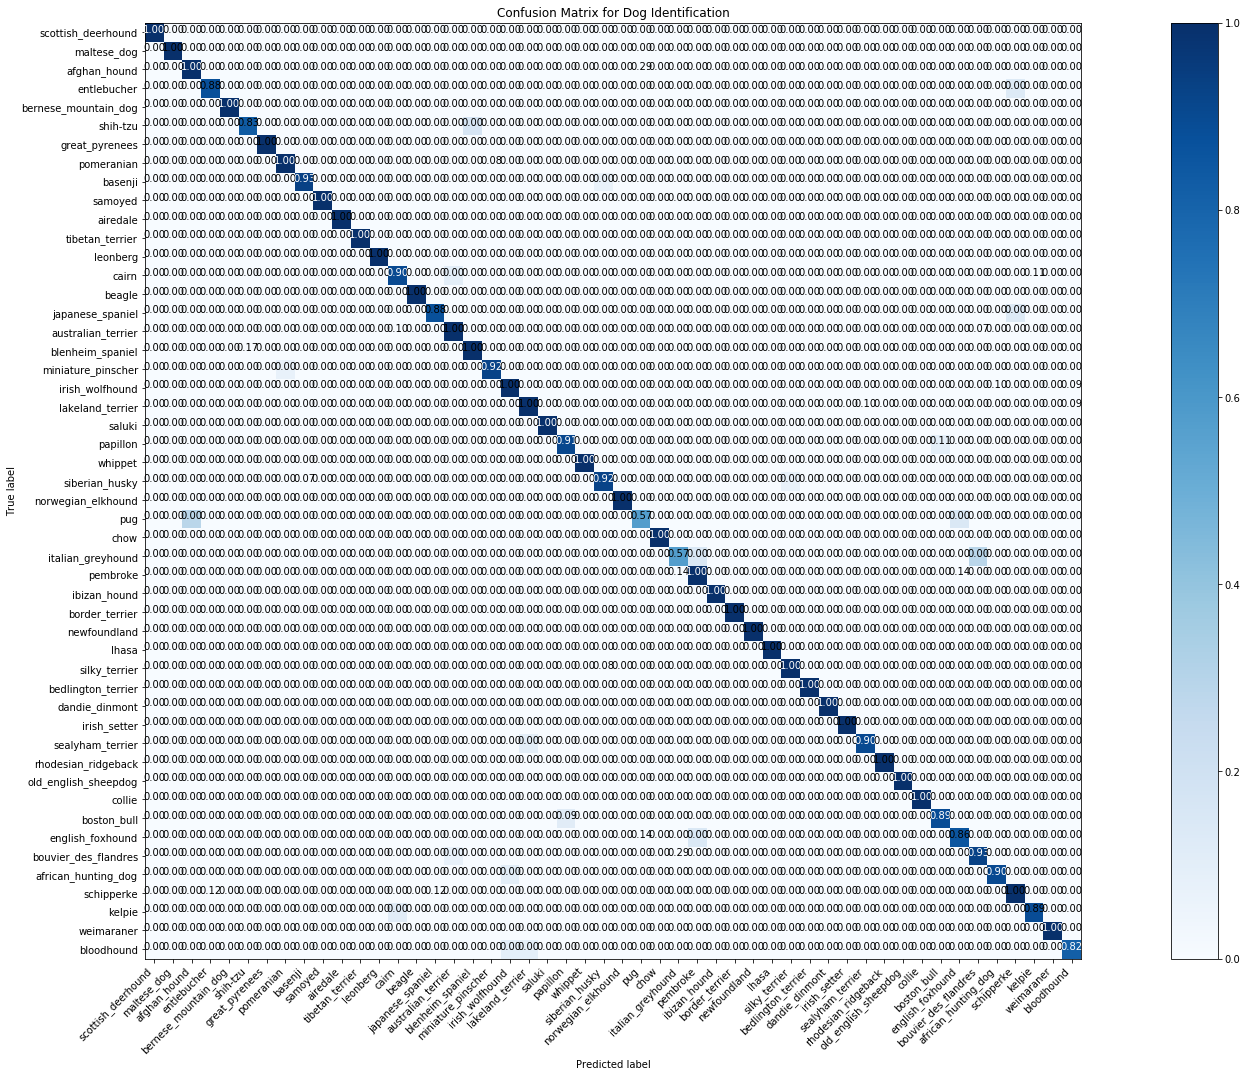

In [105]:
confusion_matrix_normalization(confusion, normalize=True)

Confusion matrix, without normalization
[[10  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0 11  0]
 [ 0  0  0 ...  0  0  9]]


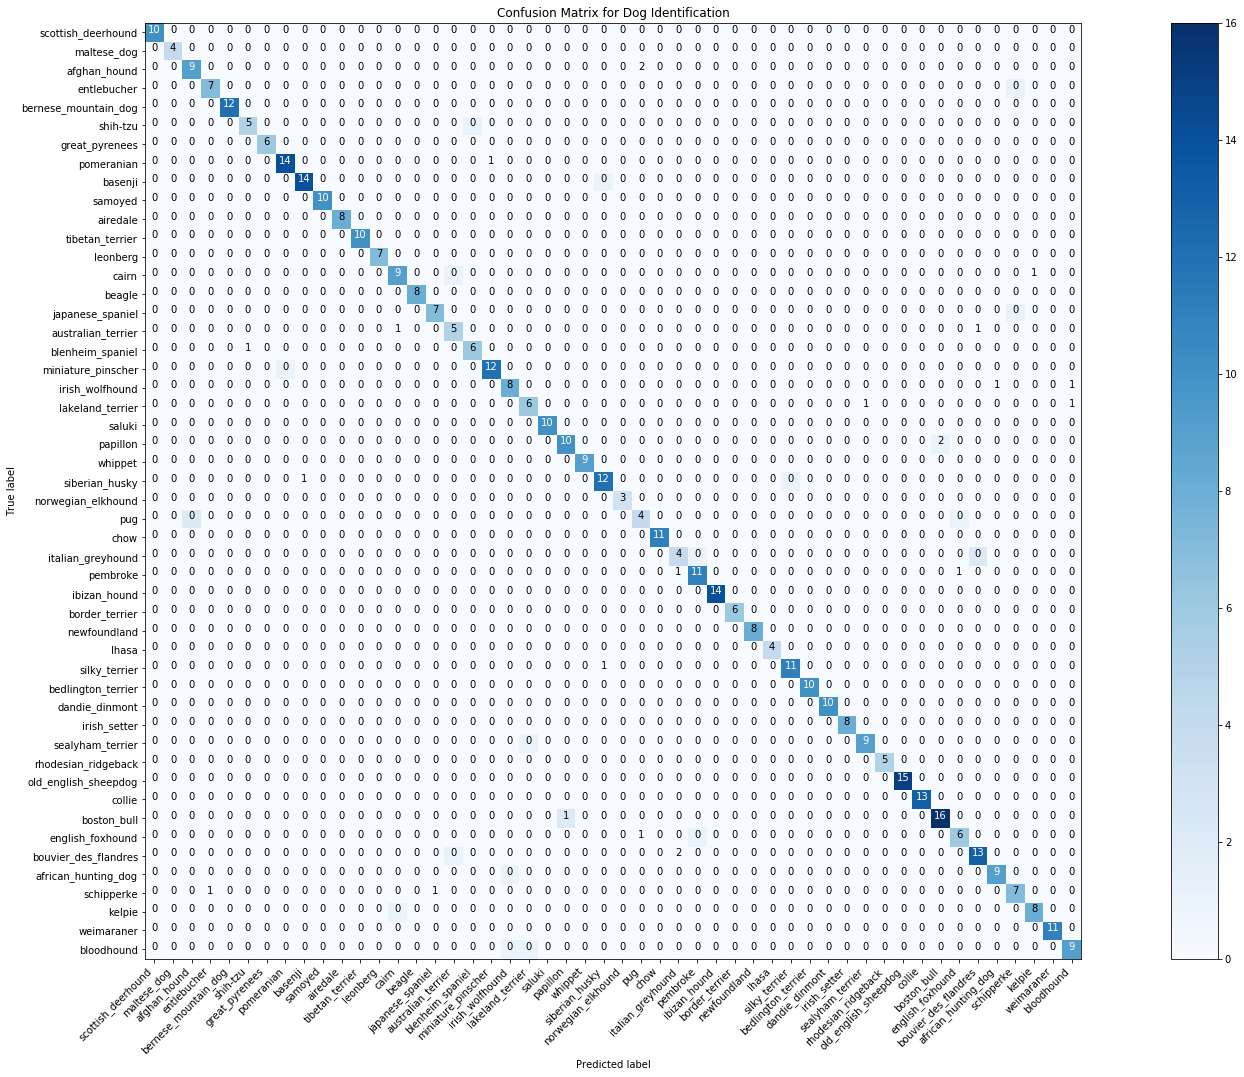

In [106]:
confusion=confusion_matrix(yv, rounded_predictions)
confusion_matrix_normalization(confusion,normalize=False)

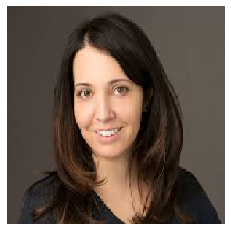

afghan_hound
0.25300586223602295


In [5]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import pandas as pd

#constants
num_classes = 50 # the number of breeds we want to classify

#Read the csv into a dataframe, group the breeds and 
df = pd.read_csv('C:/Users/win10/Documents/pati/Licenta/dog-breed-identification/labels.csv')
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)

model = load_model('2020-04-13_dog_breed_model.h5')

img = image.load_img('woman.jpg', target_size=(299, 299))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

pred = model.predict(img_tensor)
sorted_breeds_list = sorted(selected_breed_list)
predicted_class = sorted_breeds_list[np.argmax(pred)]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()

print(f"{predicted_class}\n{max(pred)[sorted_breeds_list.index(predicted_class)]}")

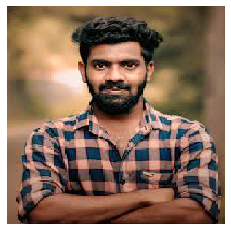

rhodesian_ridgeback
0.35670915246009827


In [6]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import pandas as pd

#constants
num_classes = 50 # the number of breeds we want to classify

#Read the csv into a dataframe, group the breeds and 
df = pd.read_csv('C:/Users/win10/Documents/pati/Licenta/dog-breed-identification/labels.csv')
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)

model = load_model('2020-04-13_dog_breed_model.h5')

img = image.load_img('man.jpg', target_size=(299, 299))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

pred = model.predict(img_tensor)
sorted_breeds_list = sorted(selected_breed_list)
predicted_class = sorted_breeds_list[np.argmax(pred)]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()

print(f"{predicted_class}\n{max(pred)[sorted_breeds_list.index(predicted_class)]}")

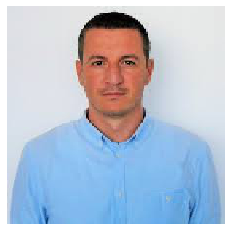

australian_terrier
0.2103148251771927


In [7]:
import numpy as np
import os
import numpy as np
import pandas as pd

#constants
num_classes = 50 # the number of breeds we want to classify

#Read the csv into a dataframe, group the breeds and 
df = pd.read_csv('C:/Users/win10/Documents/pati/Licenta/dog-breed-identification/labels.csv')
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)

model = load_model('2020-04-13_dog_breed_model.h5')

img = image.load_img('man1.jpg', target_size=(299, 299))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

pred = model.predict(img_tensor)
sorted_breeds_list = sorted(selected_breed_list)
predicted_class = sorted_breeds_list[np.argmax(pred)]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()

print(f"{predicted_class}\n{max(pred)[sorted_breeds_list.index(predicted_class)]}")

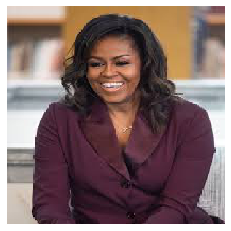

afghan_hound

0.790871679782867432


In [9]:
import numpy as np
import os
import numpy as np
import pandas as pd

#constants
num_classes = 50 # the number of breeds we want to classify

#Read the csv into a dataframe, group the breeds and 
df = pd.read_csv('C:/Users/win10/Documents/pati/Licenta/dog-breed-identification/labels.csv')
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)

model = load_model('2020-04-13_dog_breed_model.h5')

img = image.load_img('woman1.jpg', target_size=(299, 299))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

pred = model.predict(img_tensor)
sorted_breeds_list = sorted(selected_breed_list)
predicted_class = sorted_breeds_list[np.argmax(pred)]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()

print(f"{predicted_class}\n")
print("{:.18f}".format(max(pred)[sorted_breeds_list.index(predicted_class)]))

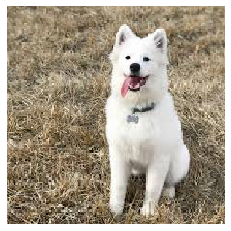

samoyed

0.974366962909698486


In [4]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import pandas as pd

#constants
num_classes = 50 # the number of breeds we want to classify

#Read the csv into a dataframe, group the breeds and 
df = pd.read_csv('C:/Users/win10/Documents/pati/Licenta/dog-breed-identification/labels.csv')
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)

model = load_model('2020-04-13_dog_breed_model.h5')

img = image.load_img('samoyed.jpg', target_size=(299, 299))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

pred = model.predict(img_tensor)
sorted_breeds_list = sorted(selected_breed_list)
predicted_class = sorted_breeds_list[np.argmax(pred)]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()

print(f"{predicted_class}\n")
print("{:.18f}".format(max(pred)[sorted_breeds_list.index(predicted_class)]))

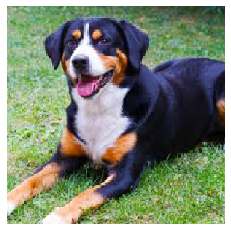

entlebucher

0.999899506568908691


In [10]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import pandas as pd

#constants
num_classes = 50 # the number of breeds we want to classify

#Read the csv into a dataframe, group the breeds and 
df = pd.read_csv('C:/Users/win10/Documents/pati/Licenta/dog-breed-identification/labels.csv')
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)

model = load_model('2020-04-13_dog_breed_model.h5')

img = image.load_img('C:/Users/win10/Documents/pati/Licenta/WebApplication/uploads/entlebutcher.jpg', target_size=(299, 299))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

pred = model.predict(img_tensor)
sorted_breeds_list = sorted(selected_breed_list)
predicted_class = sorted_breeds_list[np.argmax(pred)]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()

print(f"{predicted_class}\n")
print("{:.18f}".format(max(pred)[sorted_breeds_list.index(predicted_class)]))

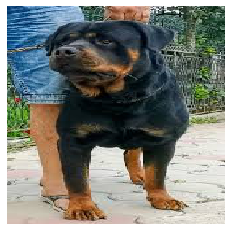

newfoundland

0.301161050796508789


In [12]:
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import pandas as pd

#constants
num_classes = 50 # the number of breeds we want to classify

#Read the csv into a dataframe, group the breeds and 
df = pd.read_csv('C:/Users/win10/Documents/pati/Licenta/dog-breed-identification/labels.csv')
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)

model = load_model('2020-04-13_dog_breed_model.h5')

img = image.load_img('rottweiler.jpg', target_size=(299, 299))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

pred = model.predict(img_tensor)
sorted_breeds_list = sorted(selected_breed_list)
predicted_class = sorted_breeds_list[np.argmax(pred)]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()

print(f"{predicted_class}\n")
print("{:.18f}".format(max(pred)[sorted_breeds_list.index(predicted_class)]))

Using TensorFlow backend.
C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

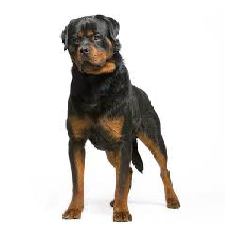

kelpie

0.421229332685470581


In [1]:
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import pandas as pd

#constants
num_classes = 50 # the number of breeds we want to classify

#Read the csv into a dataframe, group the breeds and 
df = pd.read_csv('C:/Users/win10/Documents/pati/Licenta/dog-breed-identification/labels.csv')
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)

model = load_model('2020-04-13_dog_breed_model.h5')

img = image.load_img('rottweiler1.jpg', target_size=(299, 299))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

pred = model.predict(img_tensor)
sorted_breeds_list = sorted(selected_breed_list)
predicted_class = sorted_breeds_list[np.argmax(pred)]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()

print(f"{predicted_class}\n")
print("{:.18f}".format(max(pred)[sorted_breeds_list.index(predicted_class)]))

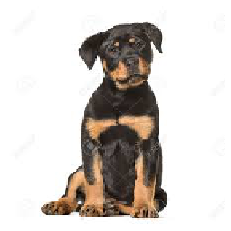

kelpie

0.381957411766052246


In [2]:
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import pandas as pd

#constants
num_classes = 50 # the number of breeds we want to classify

#Read the csv into a dataframe, group the breeds and 
df = pd.read_csv('C:/Users/win10/Documents/pati/Licenta/dog-breed-identification/labels.csv')
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)

model = load_model('2020-04-13_dog_breed_model.h5')

img = image.load_img('rottweiler2.jpg', target_size=(299, 299))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

pred = model.predict(img_tensor)
sorted_breeds_list = sorted(selected_breed_list)
predicted_class = sorted_breeds_list[np.argmax(pred)]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()

print(f"{predicted_class}\n")
print("{:.18f}".format(max(pred)[sorted_breeds_list.index(predicted_class)]))

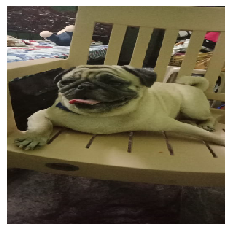

We recognized a puggy!!!


In [2]:
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import pandas as pd

#constants
num_classes = 50 # the number of breeds we want to classify

#Read the csv into a dataframe, group the breeds and 
df = pd.read_csv('C:/Users/win10/Documents/pati/Licenta/dog-breed-identification/labels.csv')
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)

model = load_model('2020-04-13_dog_breed_model.h5')

img = image.load_img('C:/Users/win10/Documents/pati/Licenta/WebApplication/uploads/puggy.jpeg', target_size=(299, 299))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

pred = model.predict(img_tensor)
sorted_breeds_list = sorted(selected_breed_list)
predicted_class = sorted_breeds_list[np.argmax(pred)]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()
assert predicted_class in 'pug'
try:
    assert predicted_class in 'rottweiler'
except:
    print("We recognized a puggy!!!")